[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
#라이브러리 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 시각화를 위한 폰트 설정
import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [4]:
df_raw = pd.read_csv("file-path/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220224220200.csv", 
                     encoding="cp949")
df_raw.shape

(450, 27)

In [7]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [8]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [14]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간",
                 value_name="백만원")
df.shape

(10800, 5)

In [15]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [21]:
"2019.4/4".split(".")[0]

'2019'

In [25]:
df["연도"] = df["기간"].map(lambda x: int(x.split(".")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [29]:
"2019.1/4".split(".")[1].split("/")[0]

'1'

In [31]:
df["분기"] = df["기간"].map(lambda x : x.split(".")[1].split("/")[0])
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [35]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기
import numpy as np
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 590.8+ KB


In [43]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 567.0+ KB


In [48]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [45]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지
# 평균값을 구하는 그래프에서 올바른 값을 표현할 수 있다.
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

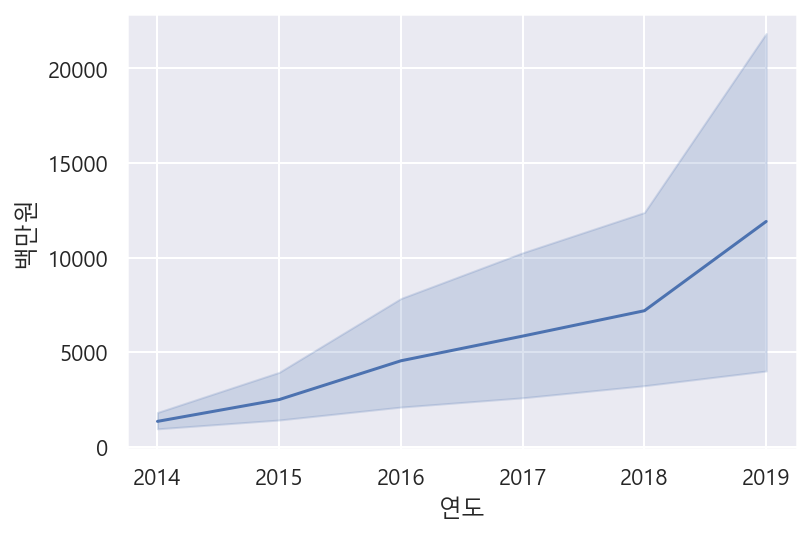

In [46]:
# 연도, 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x="연도", y="백만원")

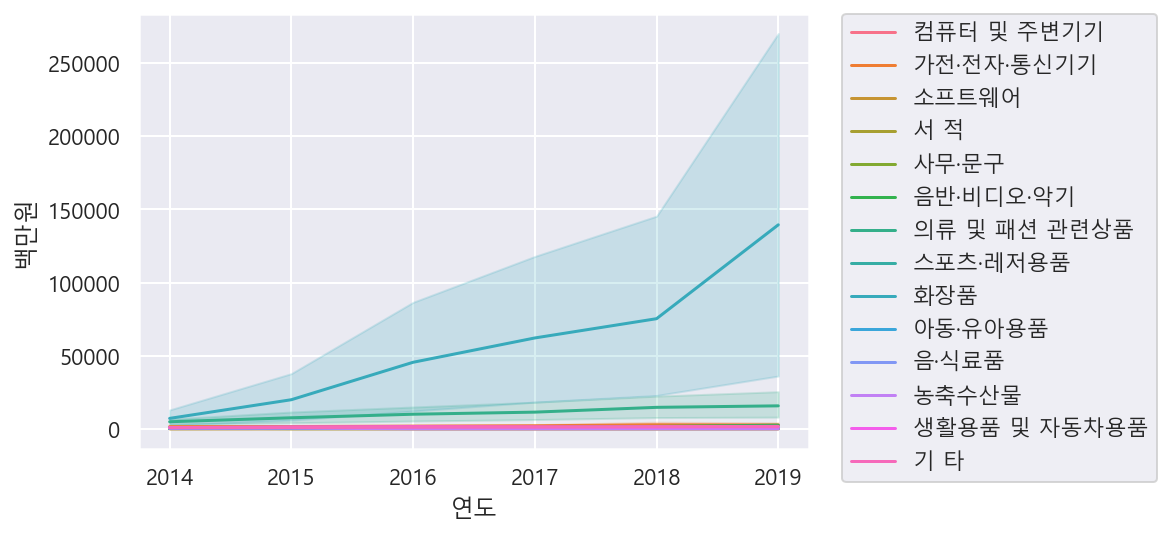

In [51]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

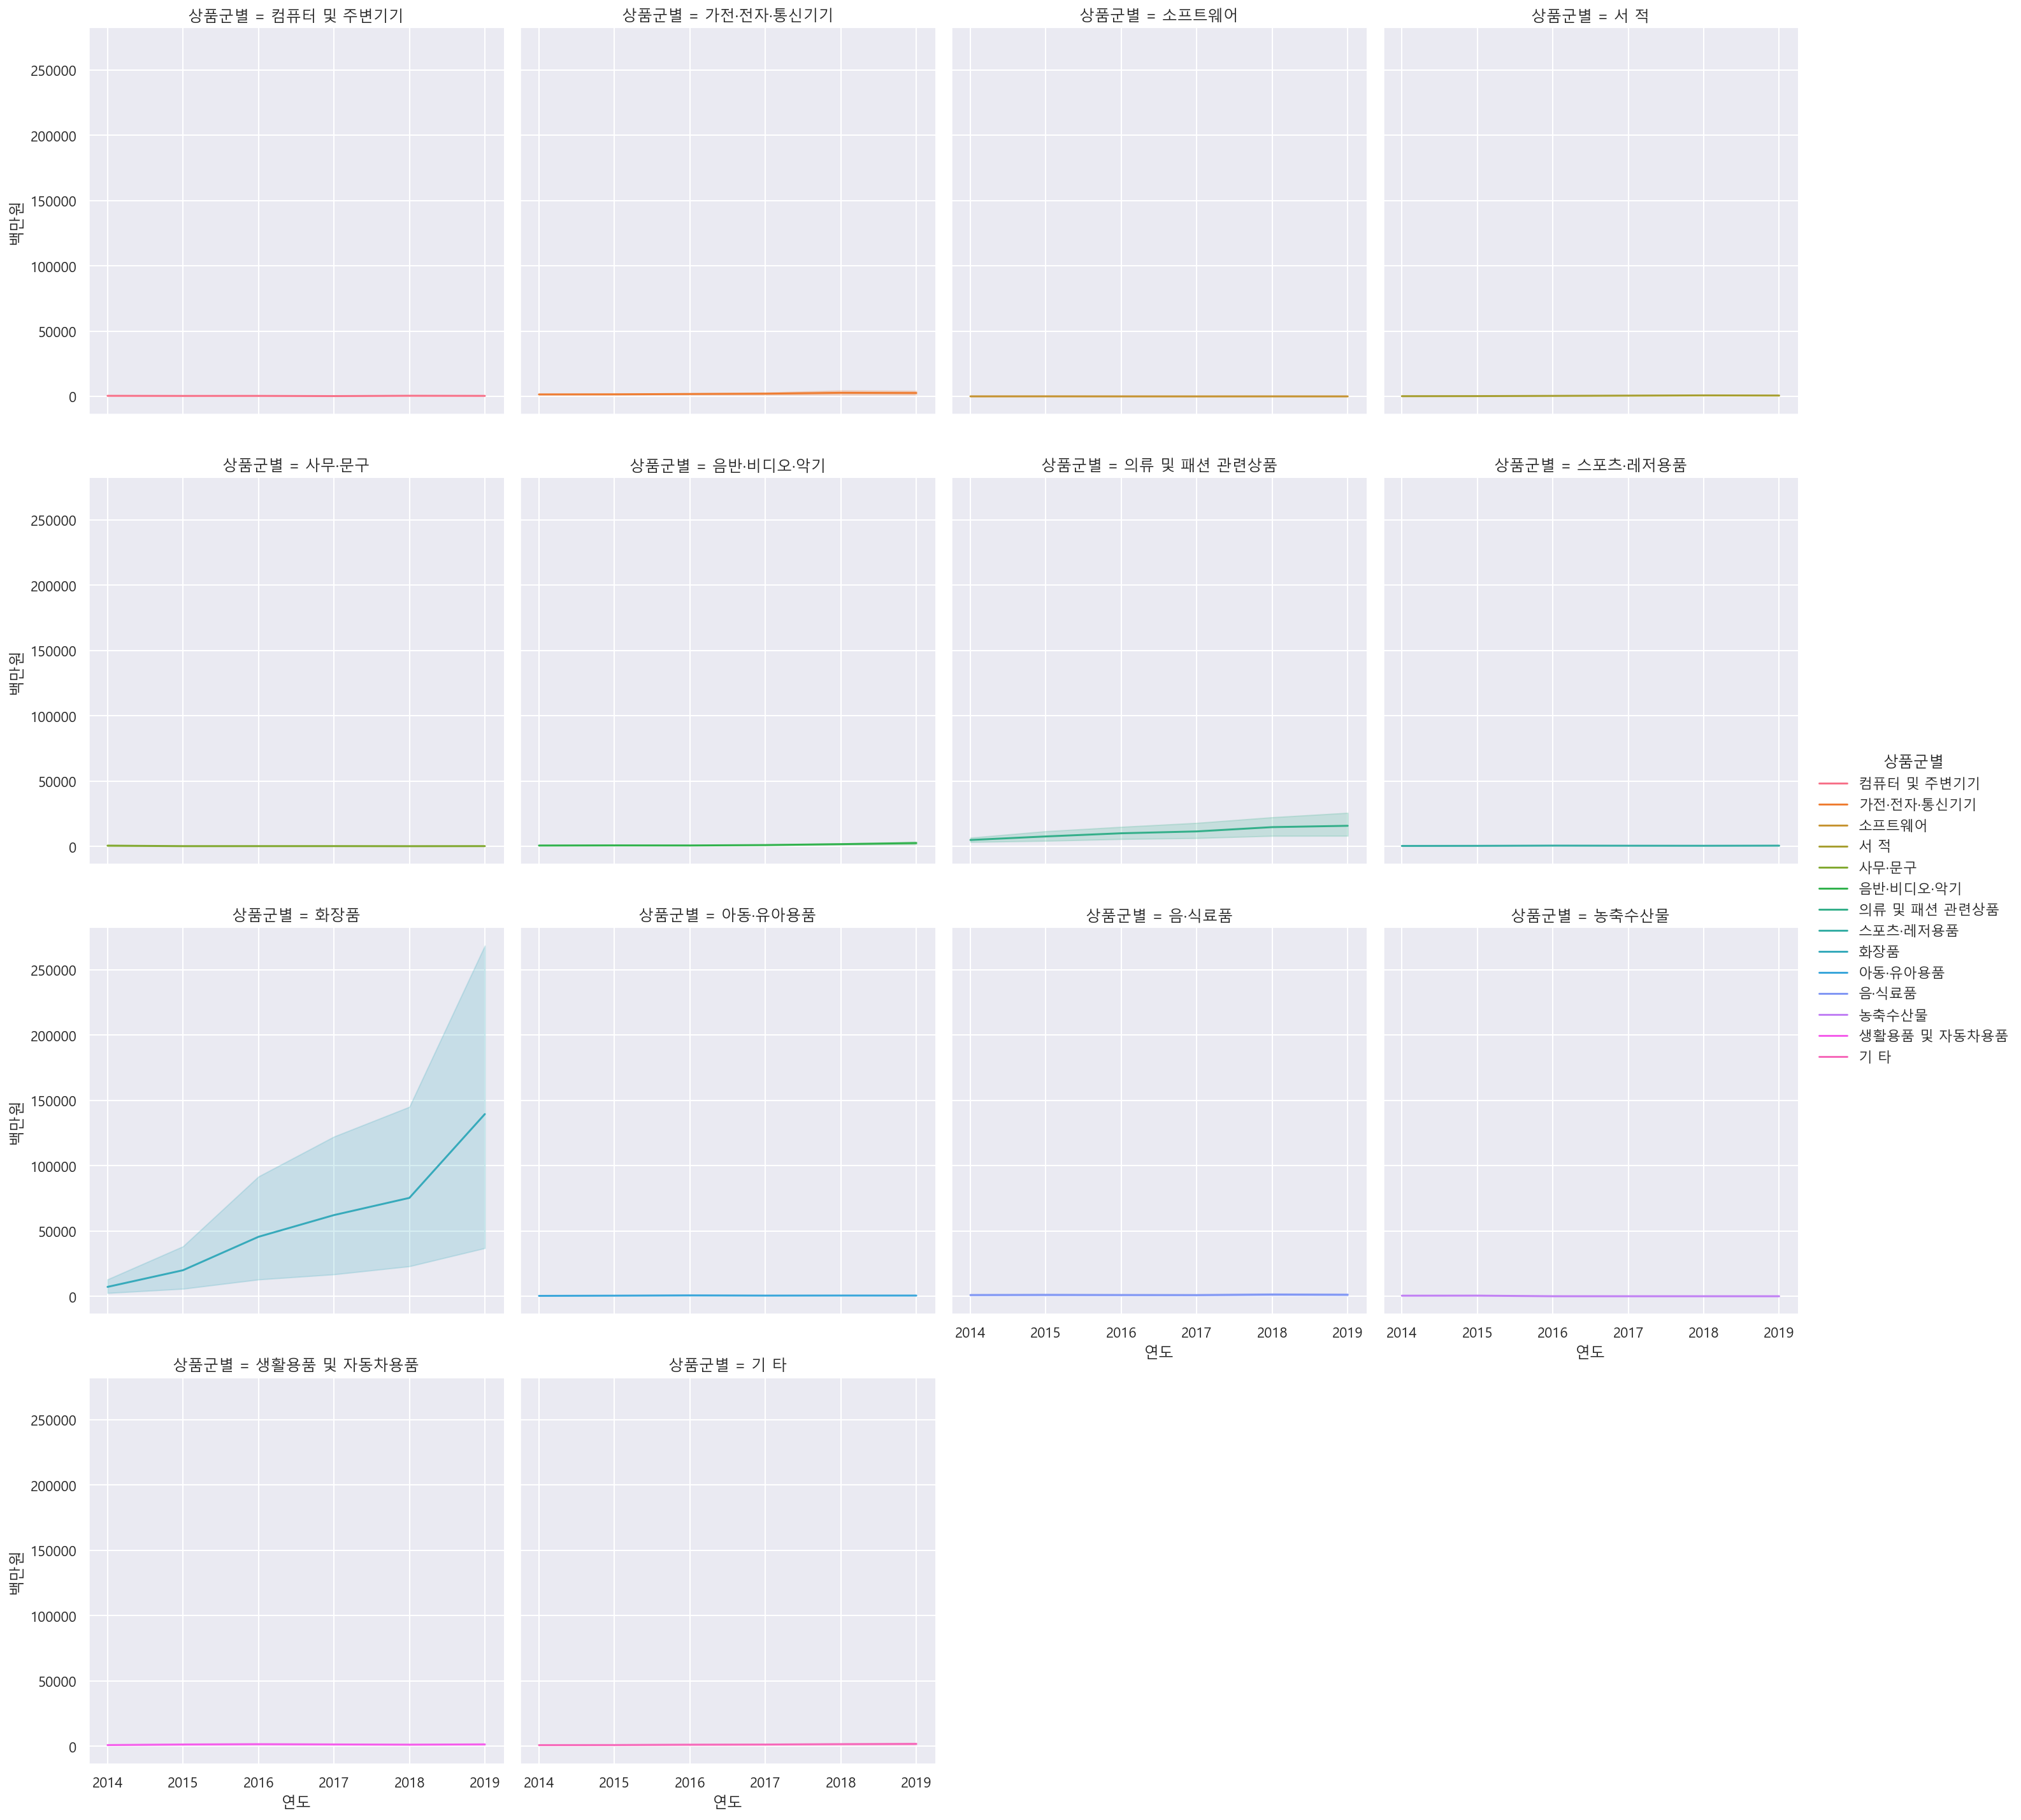

In [54]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [57]:
# isin을 사용해 화장품만 제외를 하고 df_sub이라는 변수에 담습니다.
df_sub =  df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019.4/4,193.0,2019,4
10788,기타,음·식료품,계,2019.4/4,319.0,2019,4
10791,기타,농축수산물,계,2019.4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019.4/4,531.0,2019,4


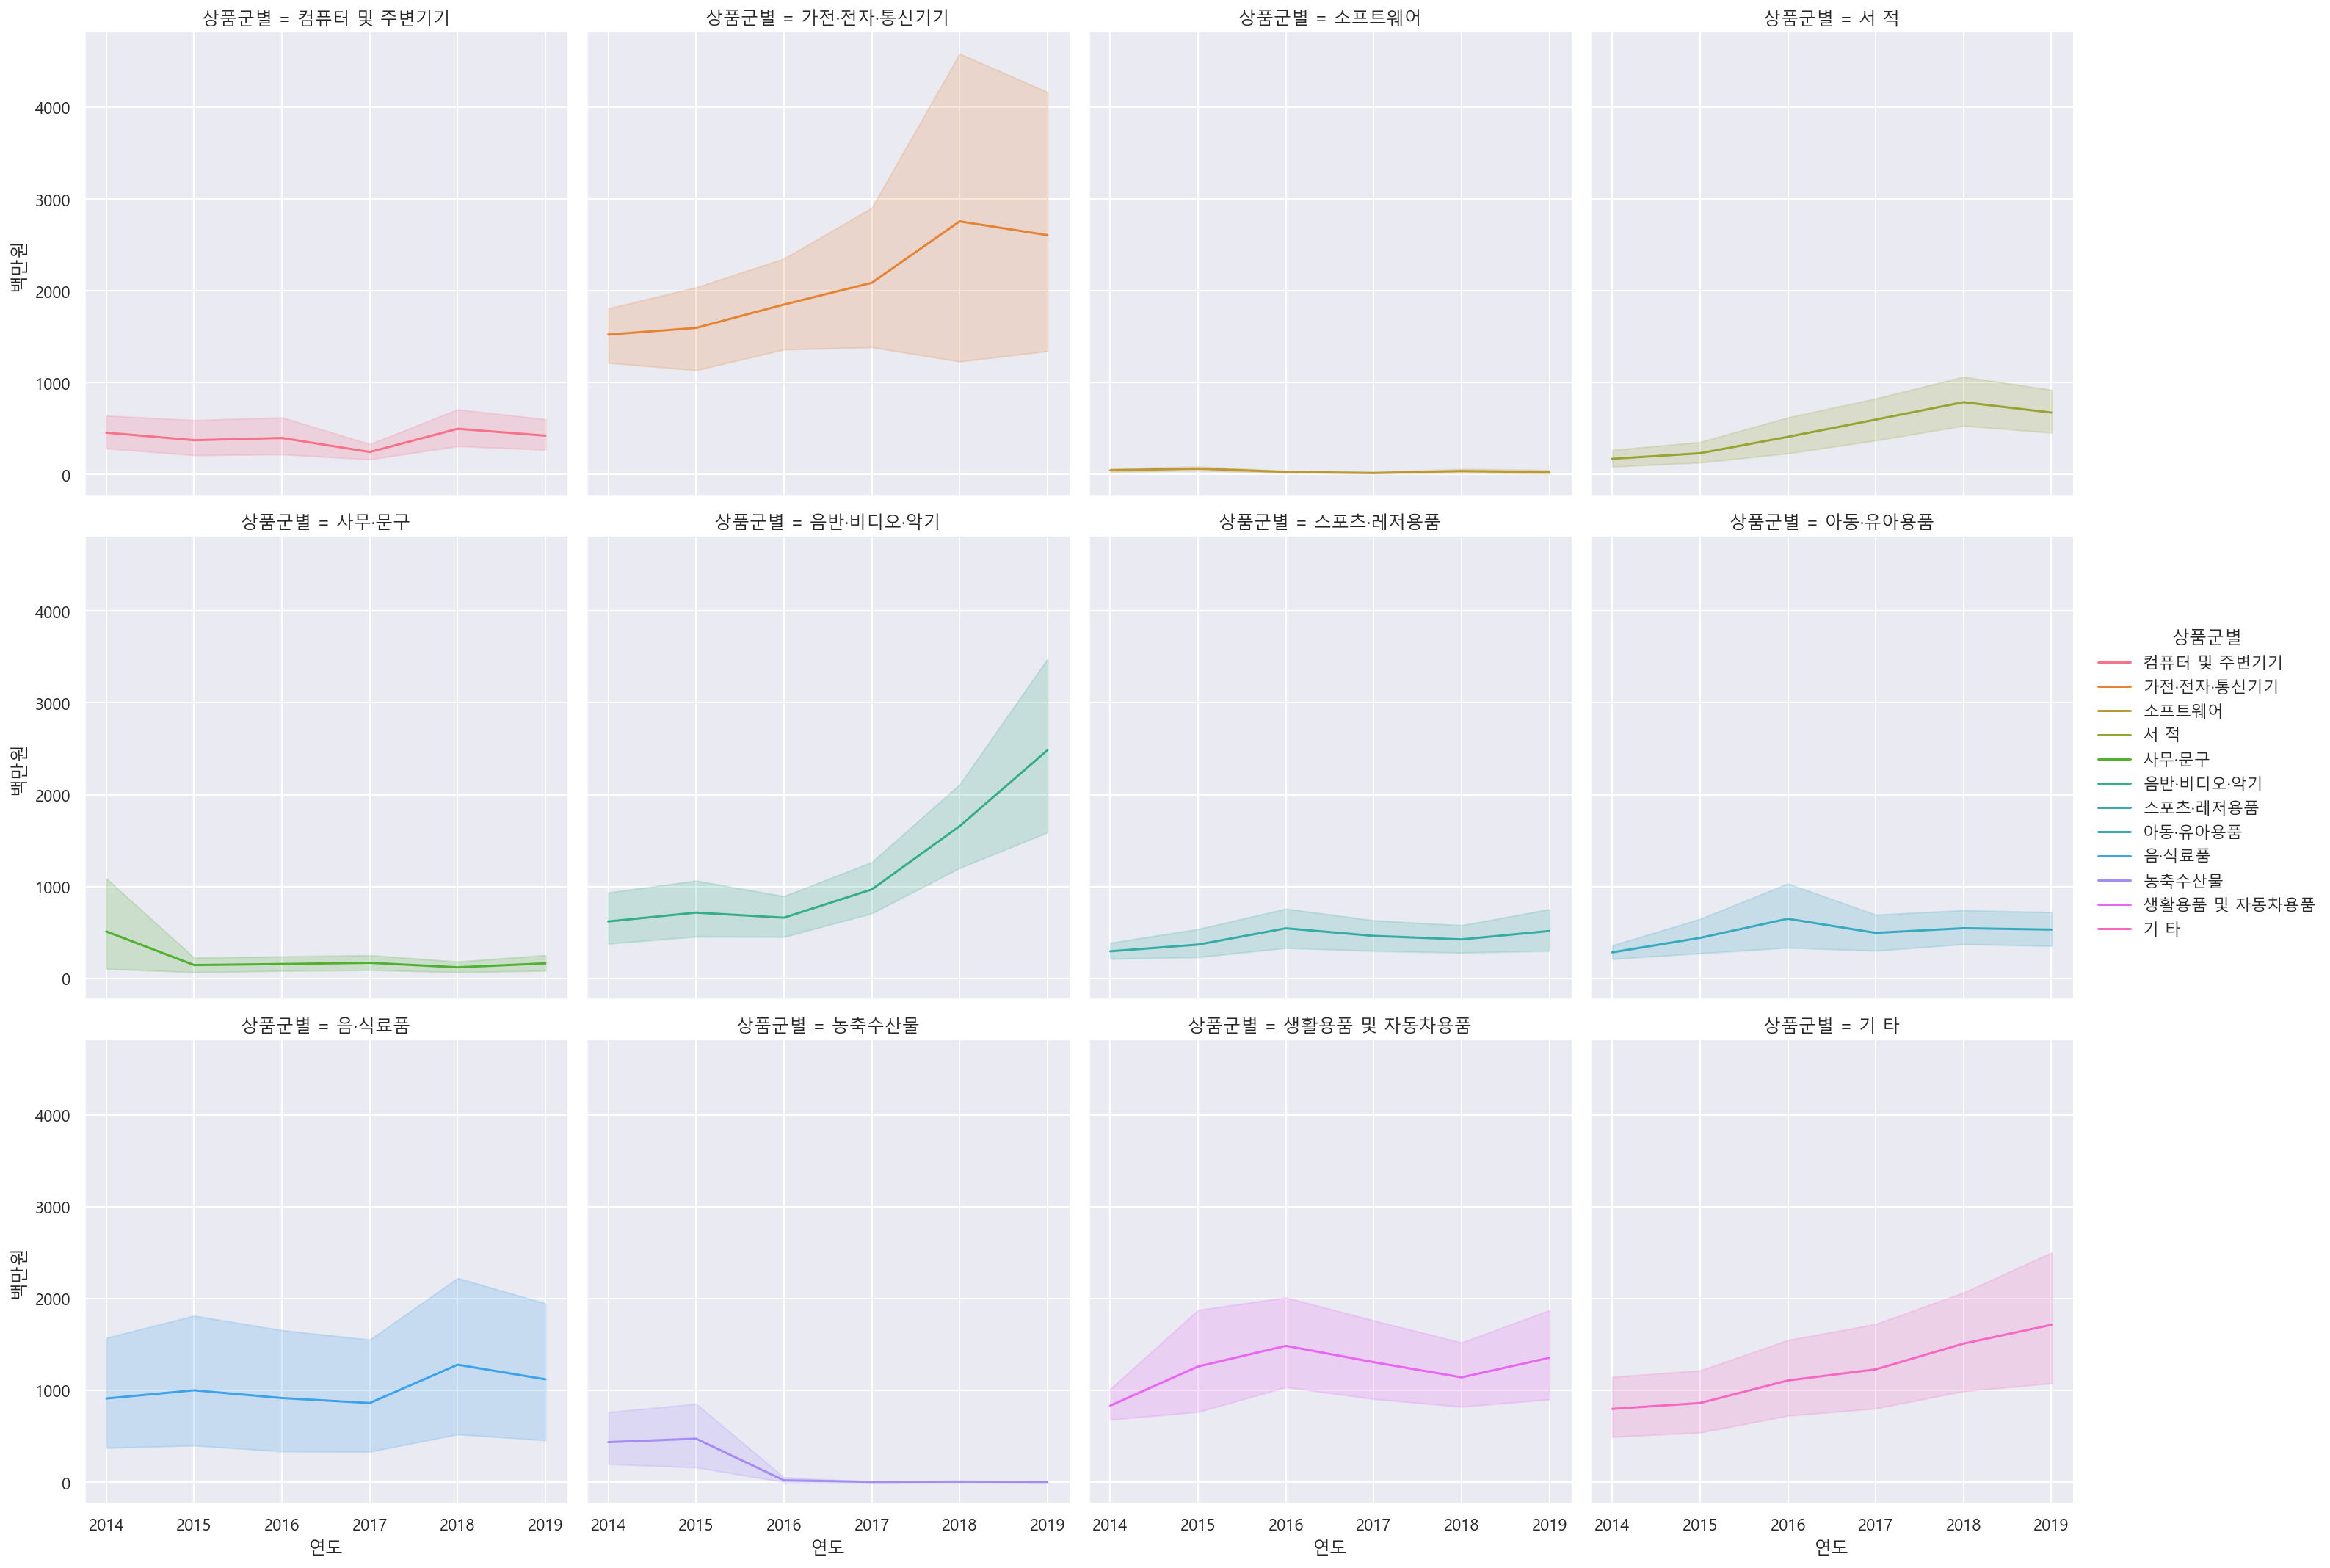

In [58]:
sns.relplot(data=df_sub, x="연도", y="백만원", 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

In [59]:
# df_cosmetic이라는 변수에 상품군별이 화장품인 데이터만 가져오기
df_cosmetic = df_total[(df_total["상품군별"] == "화장품")]
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

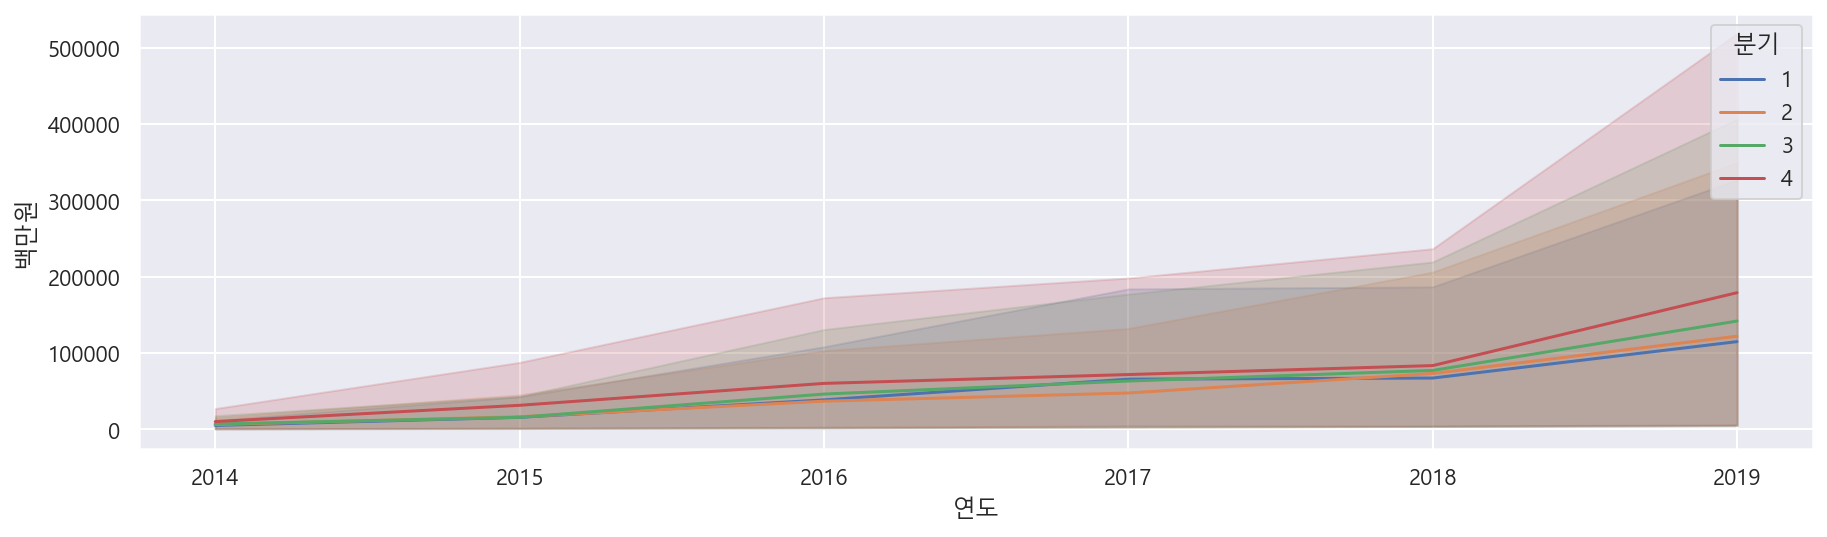

In [60]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해보기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

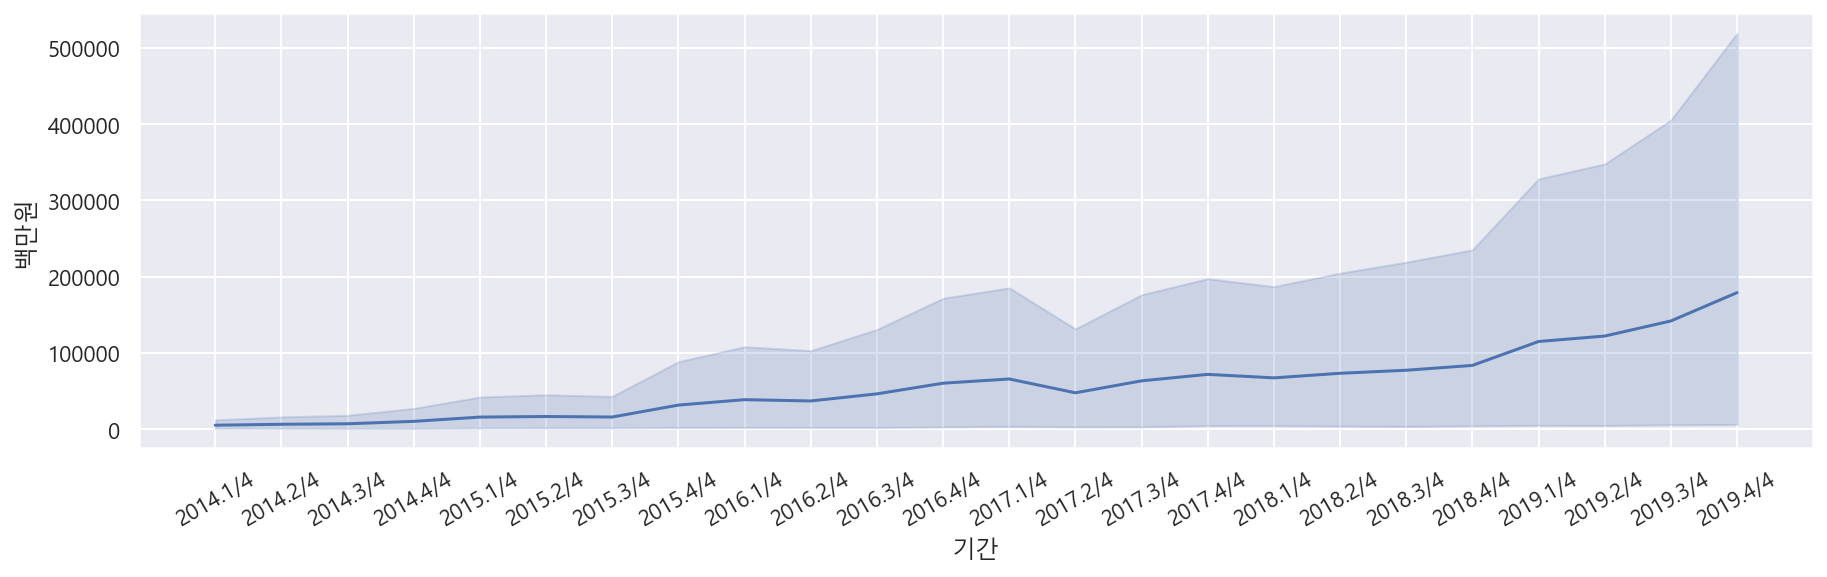

In [61]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

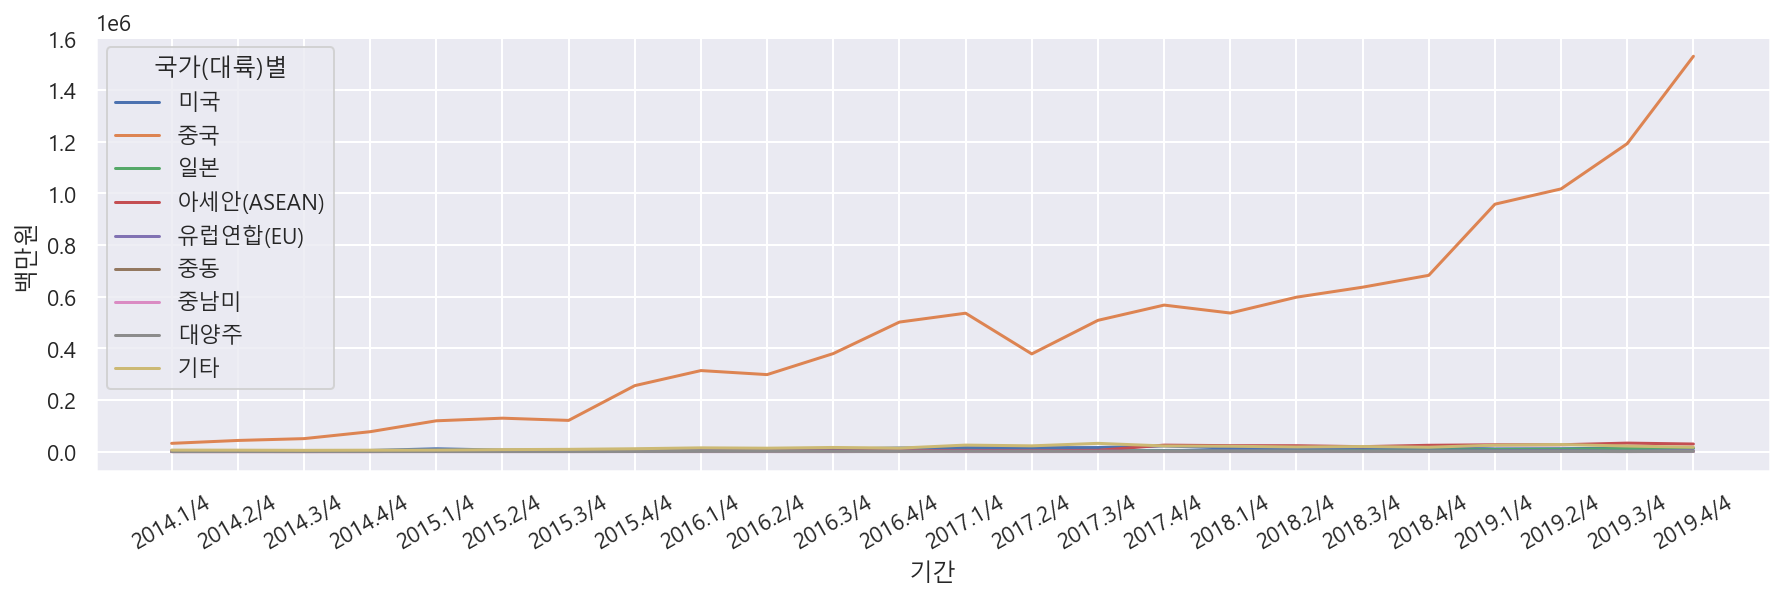

In [62]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

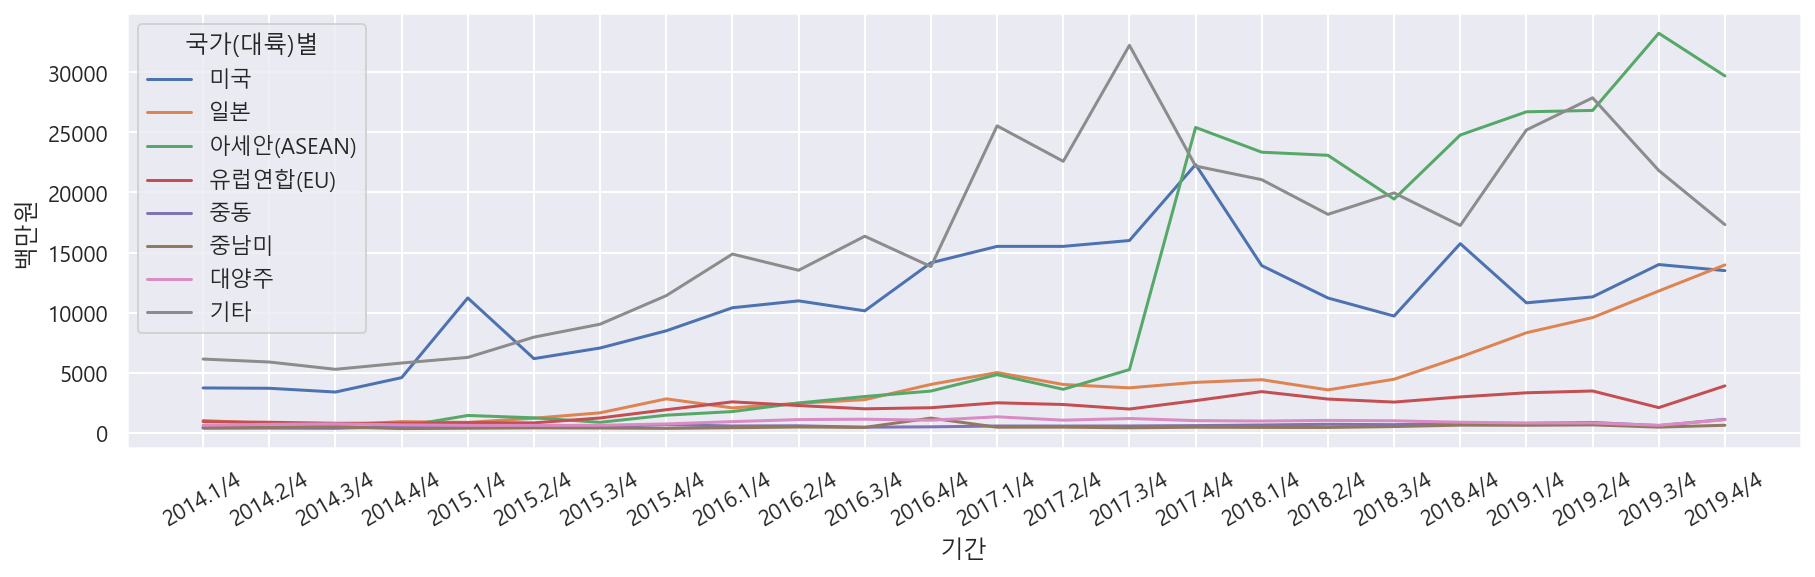

In [63]:
# 중국만 제외하고 보기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

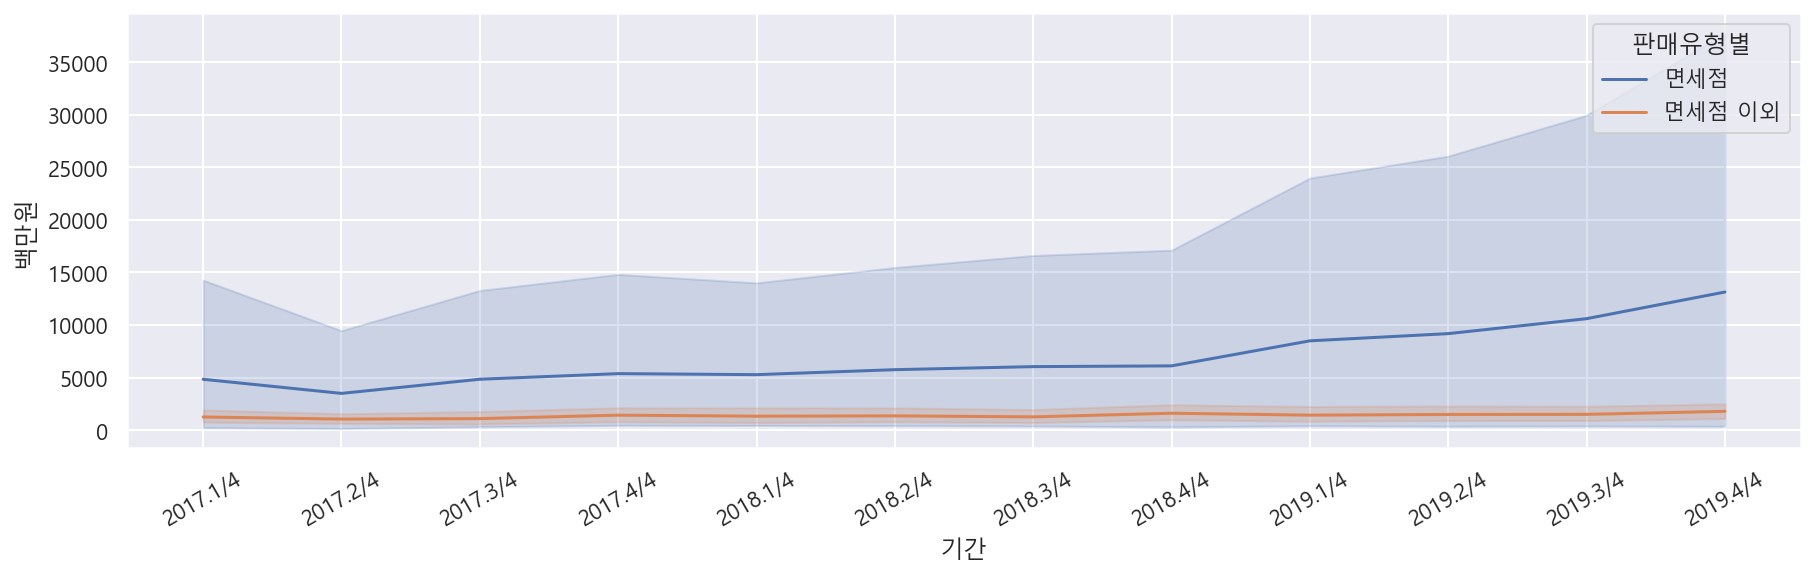

In [65]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기
df_sub = df[df["판매유형별"] != "계"].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

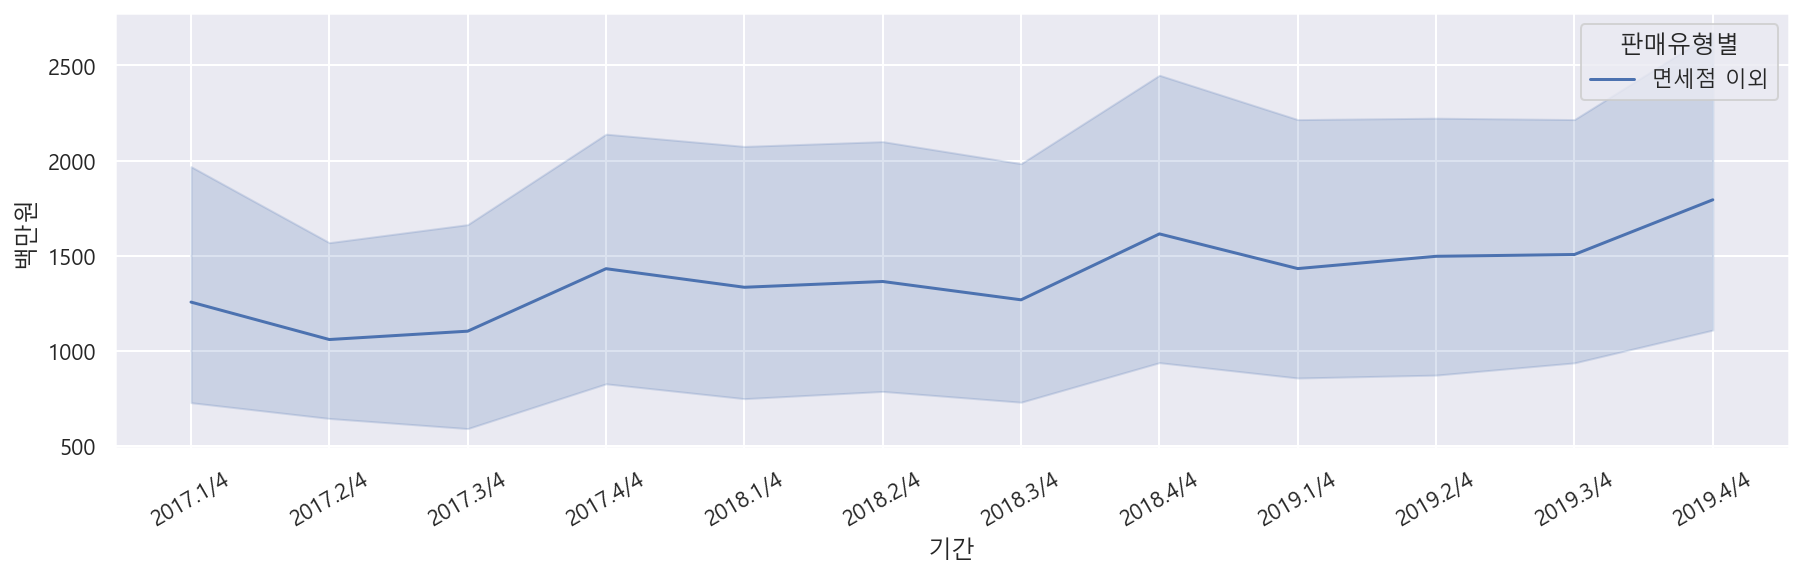

In [66]:
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [74]:
df["상품군별"].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [78]:
# df_fashion이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

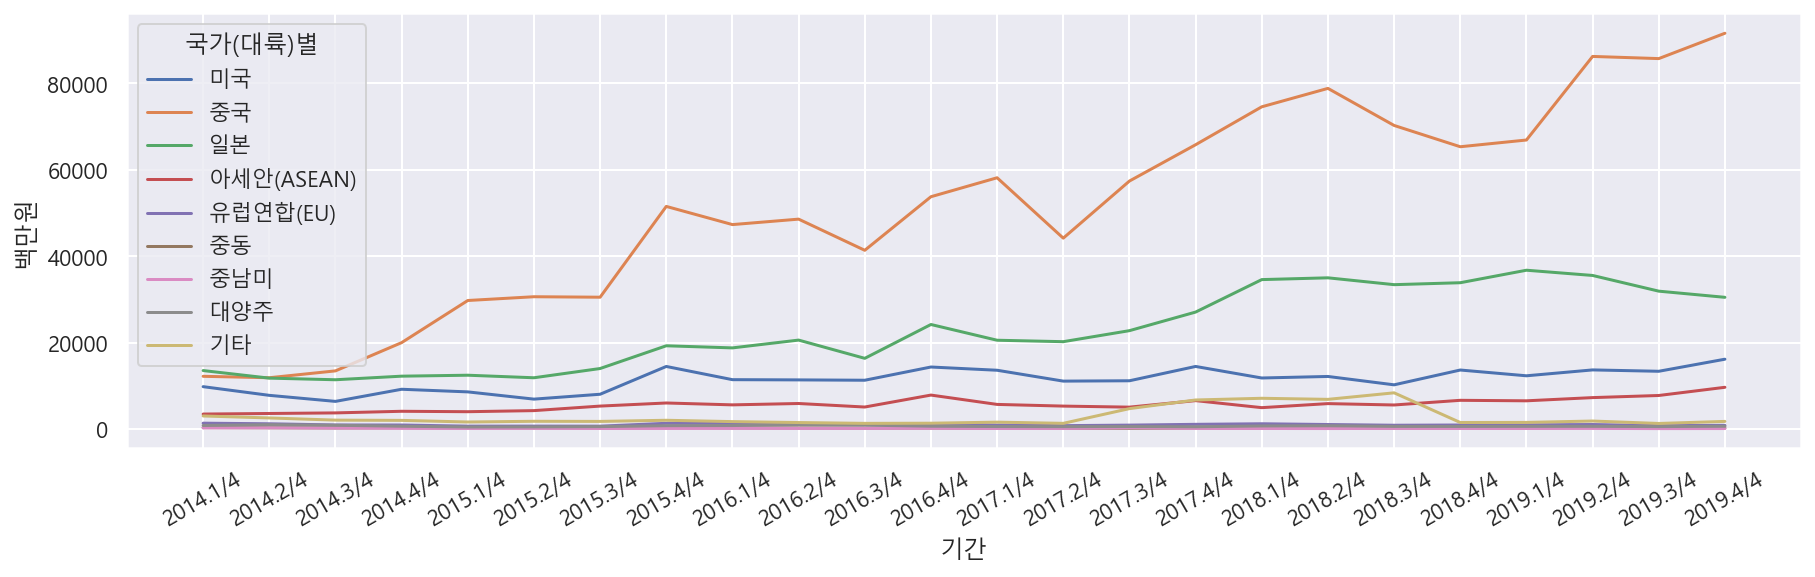

In [80]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

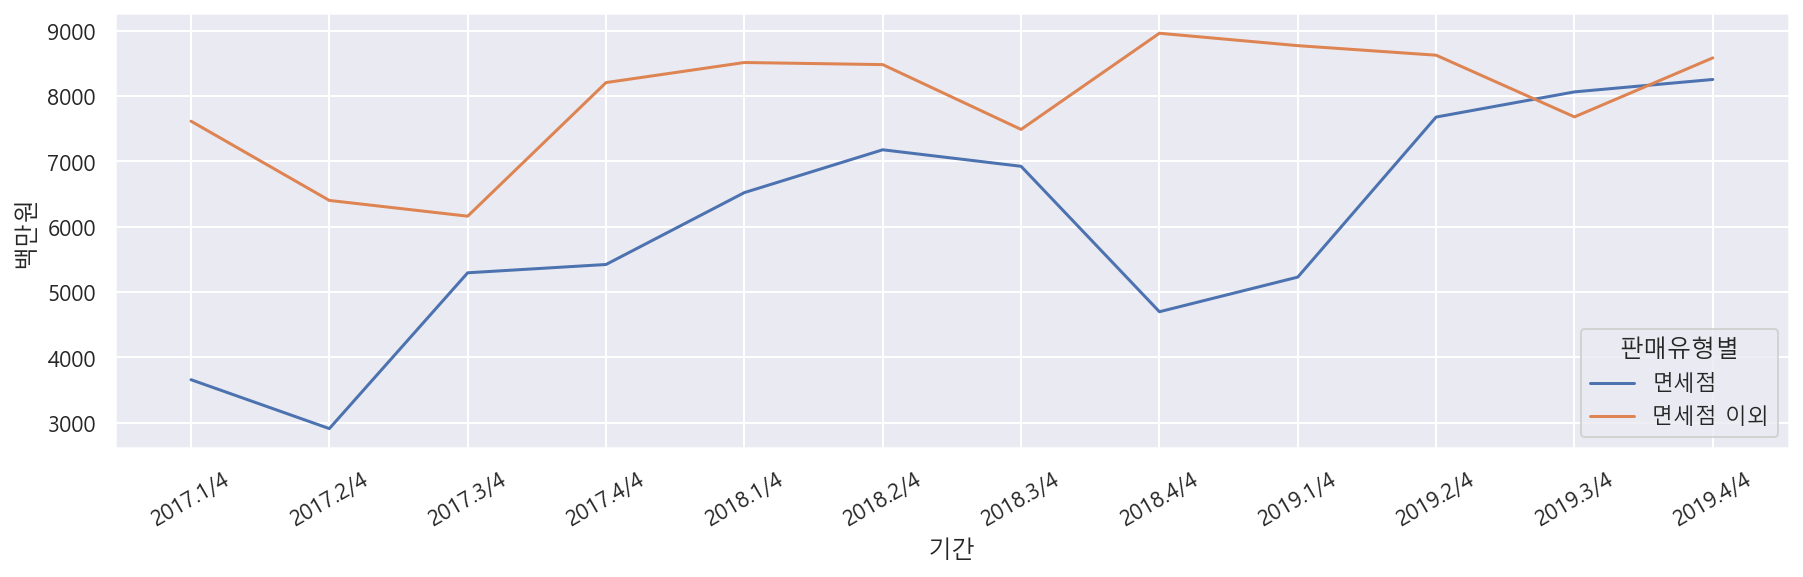

In [83]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

### 데이터 집계하기

In [84]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기
pivot = df_fashion.pivot_table(
    index="국가(대륙)별", values="백만원", 
    columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

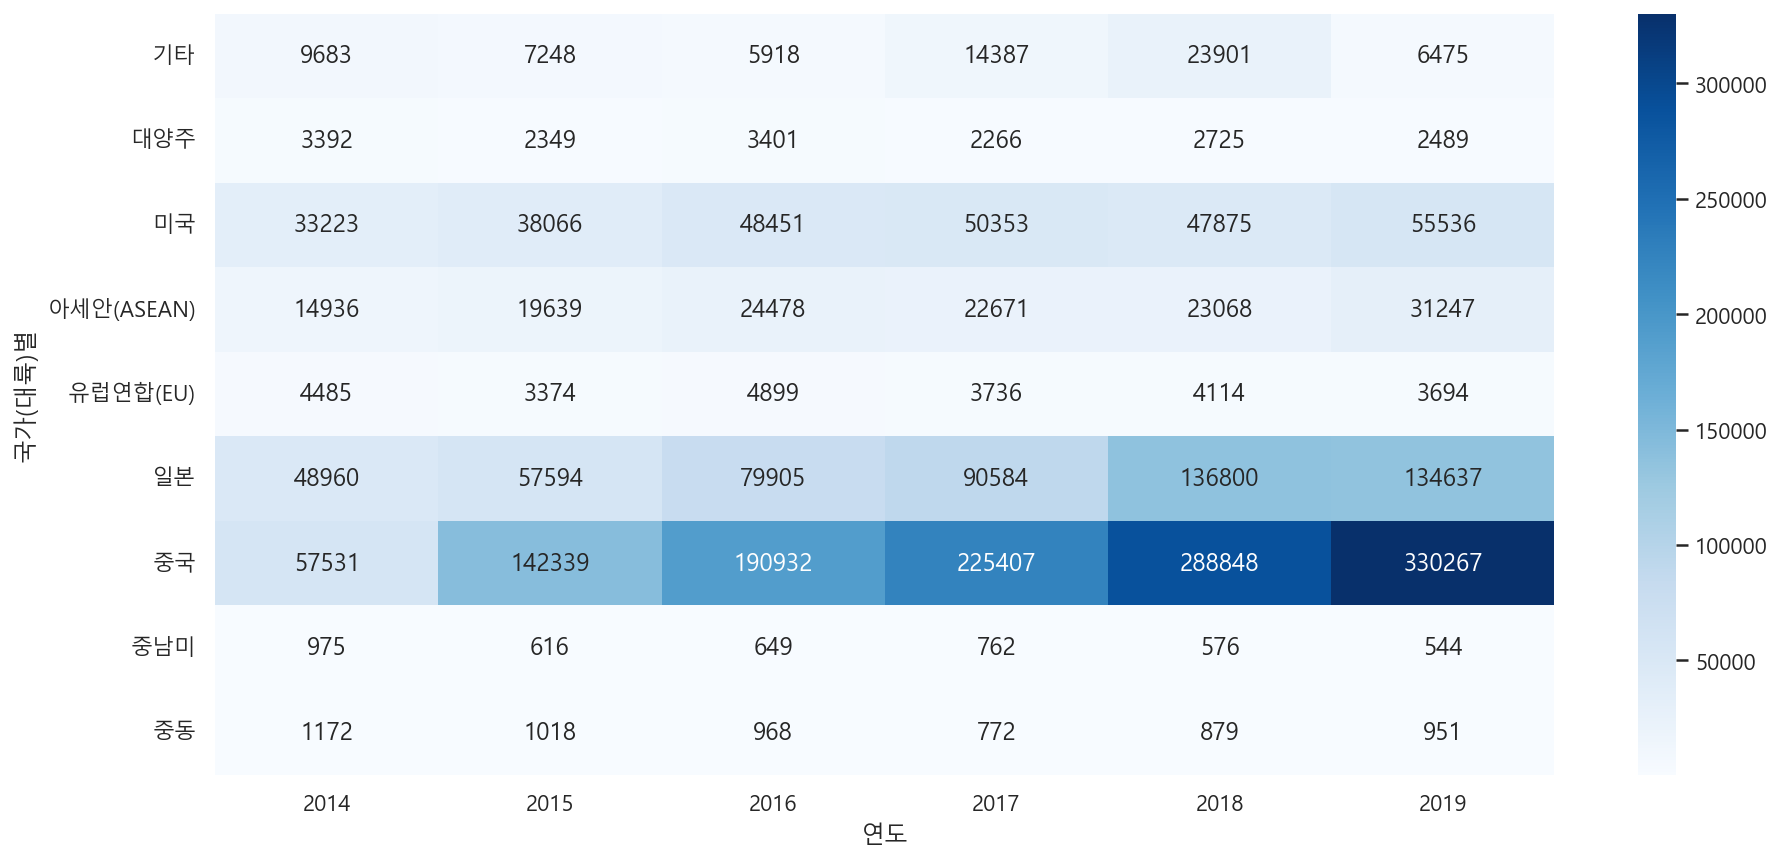

In [85]:
plt.figure(figsize=(15, 7))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='백만원'>

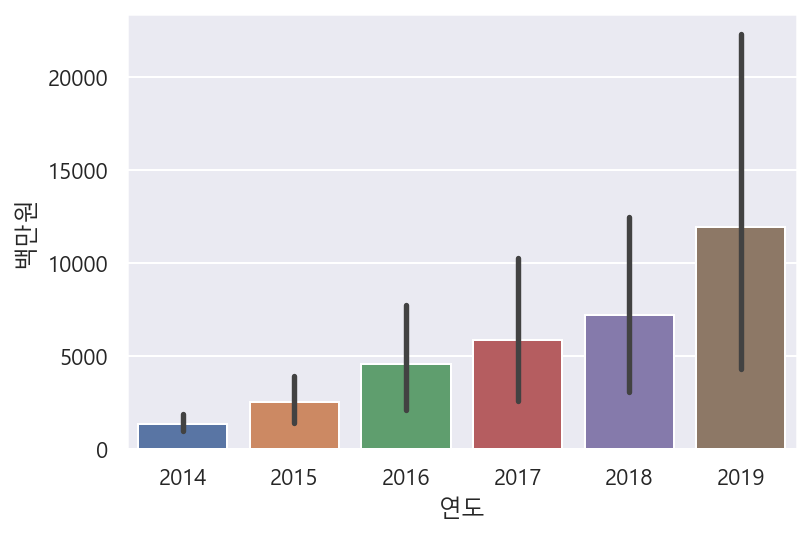

In [87]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화하기
sns.barplot(data=df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

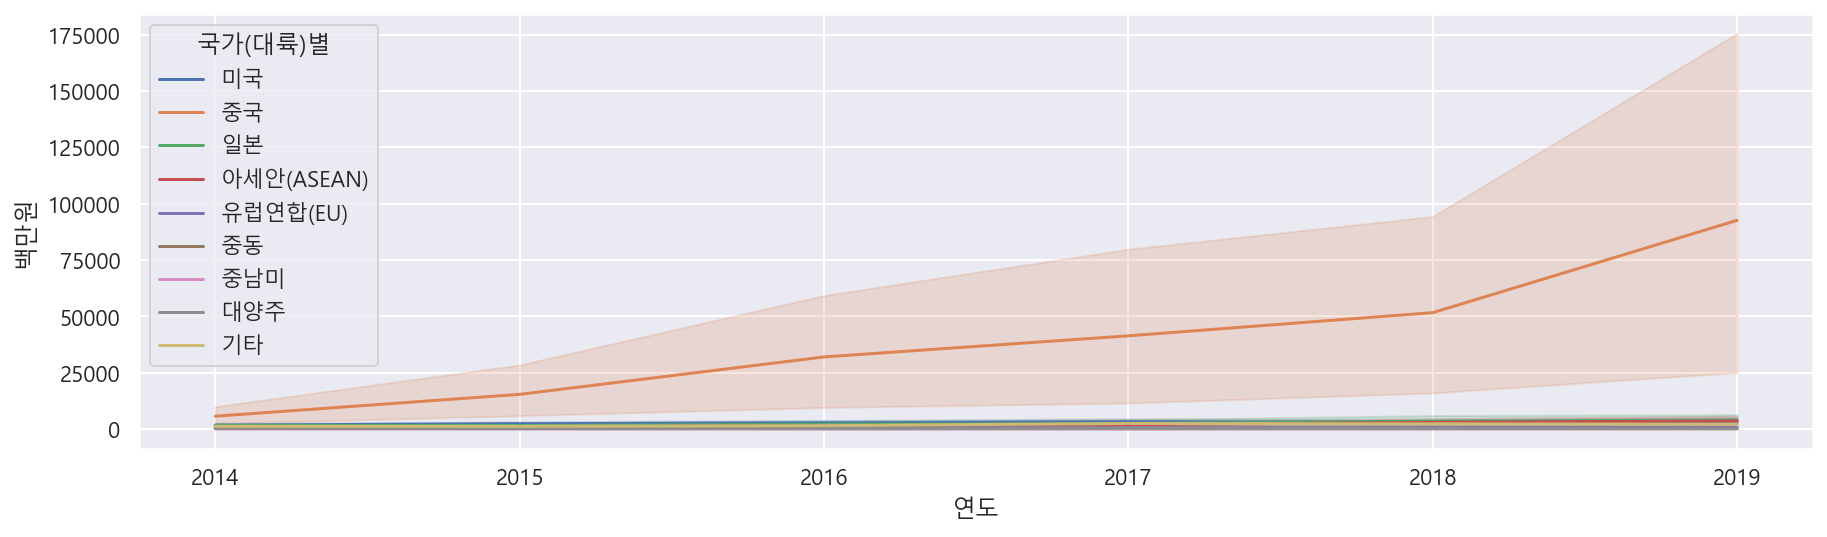

In [88]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

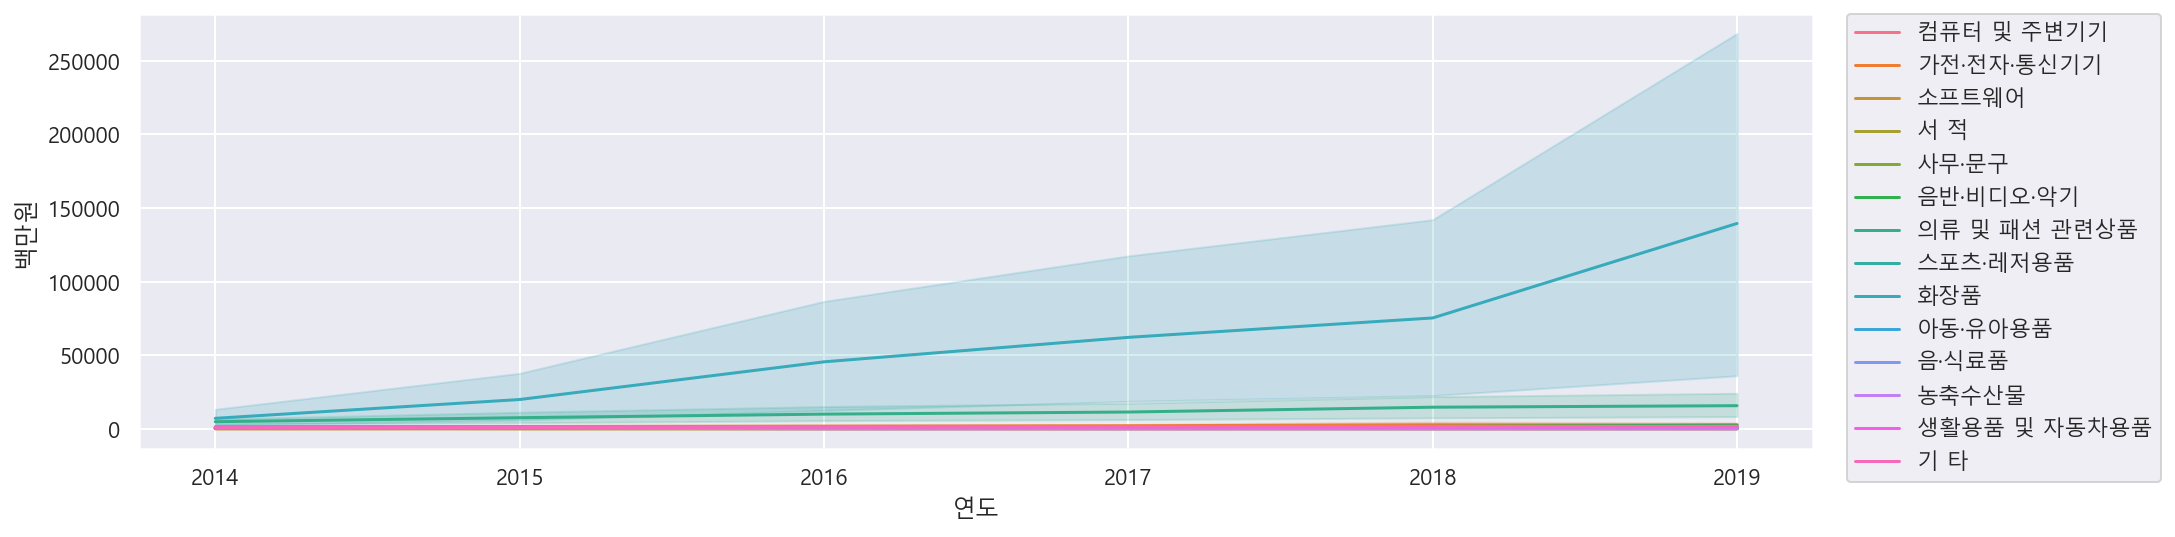

In [91]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)